# Gene Set Enrichment

In [55]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
def get_user_list_id(gene_list):
    ENRICHR_URL = 'http://amp.pharm.mssm.edu/Enrichr/addList'
    payload = {'list':(None,'\n'.join(gene_list))}

    response = requests.post(ENRICHR_URL, files=payload)
    if not response.ok:
        raise Exception('Error analyzing gene list')

    data = json.loads(response.text)
    user_list_id = data['userListId']
    
    return user_list_id

In [50]:
def get_enrichment_result(user_list_id, gene_set_library='KEGG_2019_Human'):
    ENRICHR_URL = 'http://amp.pharm.mssm.edu/Enrichr/enrich'
    response = requests.get(
        f'{ENRICHR_URL}?userListId={user_list_id}&backgroundType={gene_set_library}')
    if not response.ok:
        raise Exception('Error fetching enrichment results')

    data = json.loads(response.text)
    result_df = pd.DataFrame(columns=['Rank', 'Term name', 'P-value', 'Z-score', 'Combined score',
                                      'Overlapping genes', 'Adjusted p-value', 'Old p-value',
                                      'Old adjusted p-value'])
    for i, row in enumerate(data[gene_set_library]):
        result_df.loc[i] = row
    return result_df

In [63]:
def plot(df, file_name, palette='Blues'):
    df['-log10P'] = -np.log10(df['Adjusted p-value'])
    sns.set(style="ticks")
    f, ax = plt.subplots(figsize=(5, 10))
    sns.barplot(x="-log10P", y="Term name",
                data=df[:20], palette=palette, ax=ax)
    ax.set_xlabel('-$\mathregular{log_{10}}$P', fontsize=14)
    ax.set_ylabel('', fontsize=14)
    f.savefig(file_name, format='pdf', dpi=300)

# Bar plot

In [34]:
gene_list = ['BRD2', 'STOM', 'SLC30A7', 'SNIP1', 'MOV10', 'COLGALT1', 'ERGIC1',
             'SBNO1', 'RIPK1', 'TLE1', 'TLE3', 'CEP350', 'WASHC4', 'HS2ST1',
             'FBN1', 'SPART', 'HMOX1', 'VPS11', 'NUP98', 'PLOD2', 'STC2',
             'PLAT', 'PVR', 'LOX', 'INHBE', 'NPTX1', 'POGLUT3', 'IL17RA',
             'HS6ST2', 'GDF15', 'CHPF2', 'ADAMTS1', 'ADAM9', 'FKBP10', 'ABCC1',
             'F2RL1', 'RETREG3', 'FAR2', 'RCAN3', 'DDX5', 'HNRNPA1', 'ACE2',
             'CLEC4G', 'BCL2A1', 'FGL2', 'FGB', 'SMAD3', 'FGG', 'ANGPT2',
             'INHBA', 'INHBB', 'BMP2', 'CXCL10', 'CEACAM1', 'RPL13A', 'CHMP4B',
             'GBF1', 'SNX9', 'BTF3', 'PSMC2', 'SKP2', 'KPNA4', 'CD9', 'TMPRSS2',
             'DPP4', 'DDX1', 'SMAD3', 'GDF15']

In [36]:
user_list_id = get_user_list_id(gene_list)

In [51]:
result_df = get_enrichment_result(user_list_id)

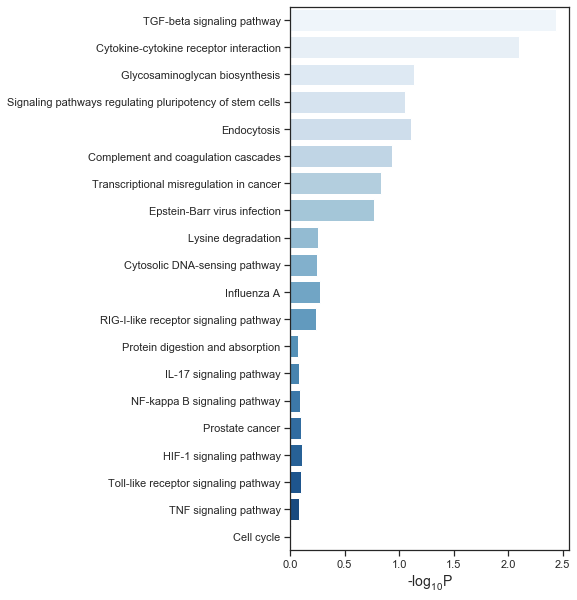

In [64]:
plot(result_df,'./kegg.pdf')

# Bubble plot